# Setup environment

In [5]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras.utils as utils

from PIL import Image
import numpy as np
import os

## Enable GPU

In [6]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Declare parameters

In [8]:
ROOT_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
MODEL_PATH = os.path.join(ROOT_DIR, "models", "binary_classification", "inception_v3", "transfer_learning.h5")

INPUT_SIZE = 299

# Input model

Binary classification trained on InceptionV3 model (developed by Google in 2015).

In [9]:
model = tf.keras.models.load_model(MODEL_PATH, custom_objects={'KerasLayer':hub.KerasLayer})
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  21802784  
_________________________________________________________________
dense (Dense)                multiple                  2049      
Total params: 21,804,833
Trainable params: 2,049
Non-trainable params: 21,802,784
_________________________________________________________________


# Run inference

## Load image from url or path

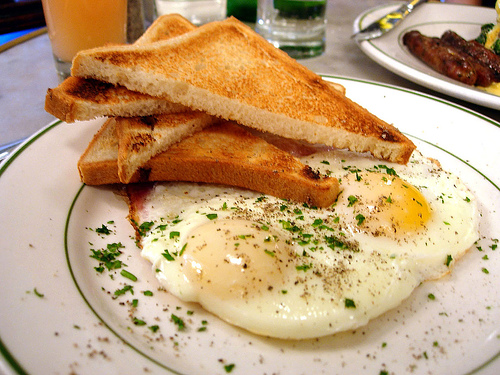

In [13]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Durham_Castle_Gatehouse_%28geograph_2907552%29.jpg/220px-Durham_Castle_Gatehouse_%28geograph_2907552%29.jpg"
path = os.path.join(ROOT_DIR, "evaluation", "images", "example.jpg")

def loadURLImage(url):
    filename = url.split('/')[-1]
    img = utils.get_file(filename, url)
    img = Image.open(img)
    return img

def loadPathImage(path):
    img = Image.open(path)
    return img

img = loadPathImage(path)
#img = loadURLImage(url)
img

## Preprocess image

In [14]:
# cast to tensor
img = tf.cast(np.asarray(img), tf.float32)

# normalise between 0 and 1
img /= 255

# resize to model input size
img = tf.image.resize_with_pad(img, INPUT_SIZE, INPUT_SIZE)

img = tf.expand_dims(img, 0)

## Predict probability of being food image

In [15]:
print("Probability being a 'food' image: {0:.3f}".format(model.predict(img)[0][0]))

Probability being a 'food' image: 0.919
